In [181]:
import scipy.stats as st
import pylab
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#loading the dataset
df=sns.load_dataset("diamonds")
df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
11388,0.34,Ideal,G,VS2,62.2,53.0,596,4.46,4.51,2.79
20763,1.01,Very Good,E,VVS2,61.5,58.0,9002,6.40,6.44,3.95
30041,0.33,Ideal,I,IF,61.5,56.0,719,4.43,4.47,2.74
1742,0.70,Ideal,H,VS2,61.5,56.0,3038,5.71,5.73,3.52
27172,2.00,Premium,I,VS1,61.1,58.0,17436,8.11,8.08,4.95


/var/folders/qh/c2j5shzd5f15l8q58y7grlwm0000gr/T/ipykernel_1533/2303800637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

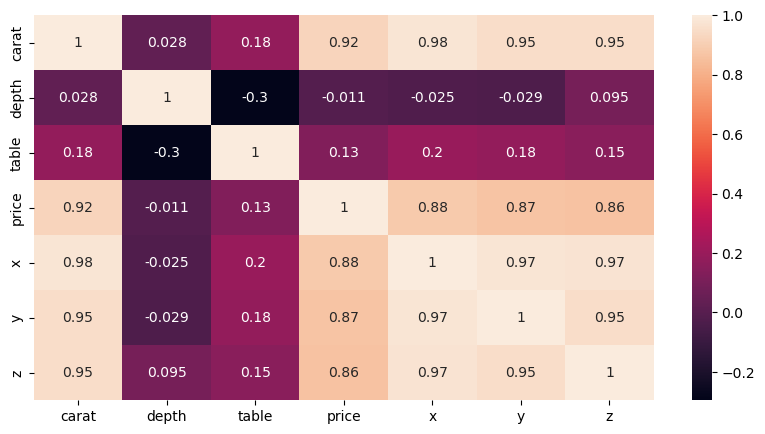

In [182]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [183]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [184]:
df=df[['carat','price']]

In [185]:
df

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


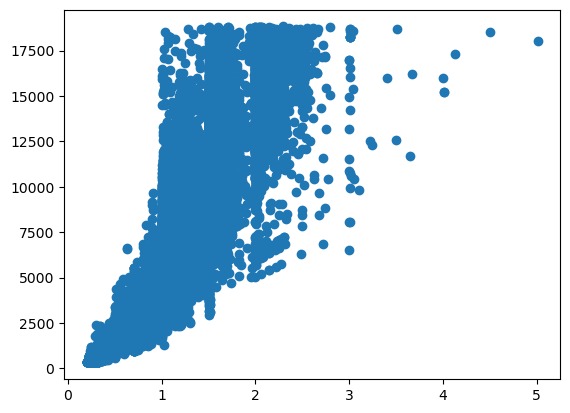

In [186]:
plt.scatter(df.carat,df.price)

In [187]:
## divide our indepned and indpend

In [190]:
Y=df['carat']
X=df[['price']]

In [191]:
X.shape

(53940, 1)

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, Y_train , Y_test=train_test_split(X,Y,test_size=.2,random_state=42)

In [194]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((43152, 1), (10788, 1), (43152,), (10788,))

In [195]:
#standardize

In [196]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [197]:
X_train=std.fit_transform(X_train)

In [198]:
X_train

array([[ 3.08061372],
       [ 0.15050529],
       [ 0.44850366],
       ...,
       [-0.73321401],
       [-0.2677952 ],
       [ 0.59662564]])

In [199]:
X_test=std.transform(X_test)

In [200]:
X_test

array([[-0.84725039],
       [-0.4357169 ],
       [-0.67707302],
       ...,
       [-0.79662325],
       [ 1.47783865],
       [-0.04949698]])

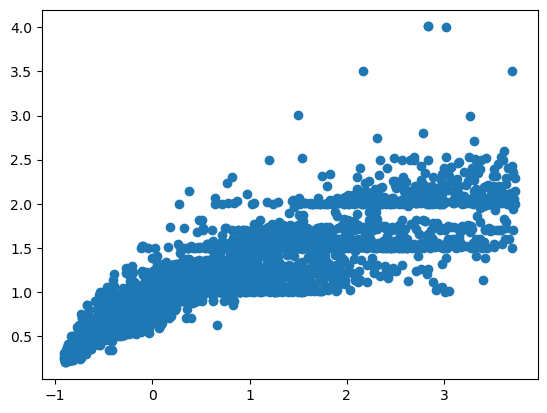

In [201]:
plt.scatter(X_test,Y_test)

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
regression=LinearRegression()

In [204]:
regression.fit(X_train,Y_train)

LinearRegression()

In [205]:
#Slopr of Coeffience of wight is 
regression.coef_[0]

0.43624582203102846

In [206]:
#Slopr of intercent of ht is 
regression.intercept_

0.7982332220986281

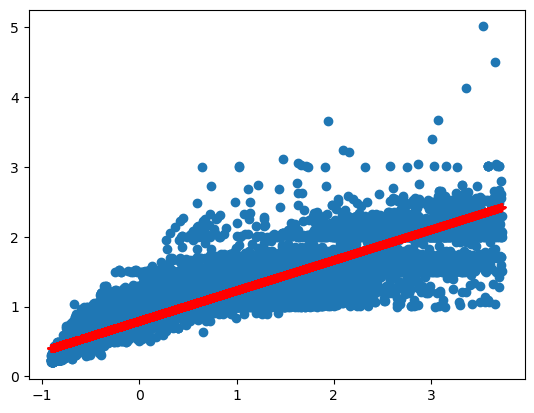

In [207]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train),'r+')

# Prediction of train data
1.prdicated credit score =intercept_+coeef_(estimarte salary)

In [208]:
y_test=regression.predict(X_test)

In [209]:
y_test

array([0.42862378, 0.60815354, 0.50286294, ..., 0.45070966, 1.44293416,
       0.77664037])

In [210]:
Y_test

1388     0.24
50052    0.58
41645    0.40
42377    0.43
17244    1.55
         ... 
44081    0.50
23713    0.25
31375    0.31
21772    1.23
4998     1.08
Name: carat, Length: 10788, dtype: float64

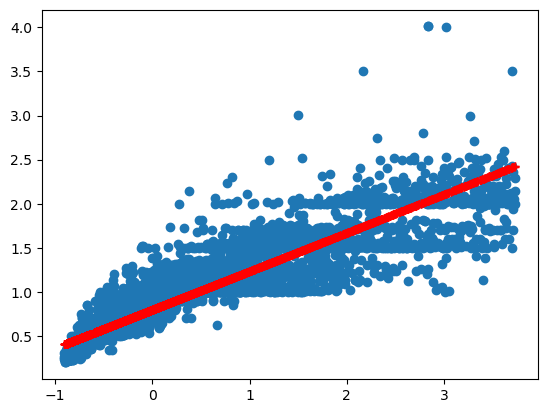

In [211]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regression.predict(X_test),'r+')

In [212]:
## Performace matrix

In [213]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [214]:
mse=mean_squared_error(Y_test,y_test)
mae=mean_squared_error(Y_test,y_test)
rmse=np.sqrt(mse)

In [215]:
mse

0.03432074417977216

In [216]:
mae

0.03432074417977216

In [217]:
rmse

0.185258587330715

In [218]:
from sklearn.metrics import r2_score

In [219]:
score=r2_score(Y_test,y_test)

In [220]:
score

0.8489555129925128

In [221]:
1-(1-score)*(len(Y_test)-1)/((len(Y_test)-1)-X_test.shape[1]-1)

0.8489275028882926

In [222]:
scaled_score=std.transform([[1]])

/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [223]:
scaled_score

array([[-0.9871016]])

In [227]:
regression.predict([scaled_score[0]])[0]

0.3676142721085461

In [ ]:
## Asummption